# Vectorisation 2-gram BoW avec CountVectorizer paramétré et classification avec MultinomialNB

In [1]:
import os
import pandas as pd

path = "data/text_classification/"

# dataset dict with emtpy attribute train
dataset = pd.DataFrame()

for file in os.listdir(path):
    if file.endswith(".csv"):
        new_data = pd.read_csv(path + file, sep=";")
        dataset = pd.concat([dataset, new_data], ignore_index=True)

dataset

,text,CORRECT,NOT_FRENCH,NOT_TRIP,UNKNOWN
0,"Allons vers l'hopital de Contrexéville, c'est ...",0,0,1,0
1,J'ai compris que ma montre devait être cassée.,0,0,1,0
2,Montre-moi le trajet pour aller Ã l'hopital d...,1,0,0,0
3,Il paracadute di Tom non si è aperto.,0,1,1,0
4,"~uw&| XOH.w!,Lnh&G",0,0,0,1
...,...,...,...,...,...
1415263,Je veux arriver Ã la ville de Aiton.,0,0,1,0
1415264,\NSzD:FtBlL6@8_k3p,0,0,0,1
1415265,"q12<|""aED%]=3vO1Z7",0,0,0,1
1415266,Mon trajet se termine Ã la gare de bourges-ga...,0,0,1,0


In [2]:
labels = [label for label in dataset.columns if label not in ['text']]
id2label = {i:label for i, label in enumerate(labels)}
label2id = {v:k for k,v in id2label.items()}

print(labels)

['CORRECT', 'NOT_FRENCH', 'NOT_TRIP', 'UNKNOWN']


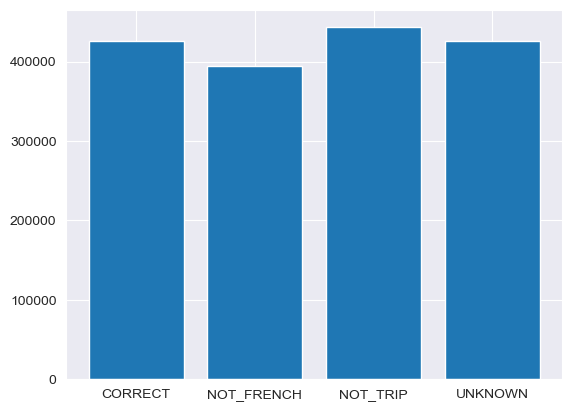

In [3]:
import matplotlib.pyplot as plt

plt.bar(labels, [sum(dataset[label]) for label in labels])
plt.show()

# Split du dataset en train, test et validation

In [4]:
from sklearn.model_selection import train_test_split

# Shuffle train dataset, and pick 50% of it
dataset = dataset.sample(frac=0.5, random_state=0)
X_train = dataset['text']
y_train = dataset[labels]

# To check how vectorizer works without UNKNOWN words being isolated
X_train_without_unknown = dataset[dataset['UNKNOWN'] == 0]['text']
y_train_without_unknown = dataset[dataset['UNKNOWN'] == 0][labels]

# Split test dataset into 10% validation and 10% test
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

print(X_train.shape, X_test.shape, X_val.shape)
print(y_train.shape, y_test.shape, y_val.shape)

(566107,) (70763,) (70764,)
(566107, 4) (70763, 4) (70764, 4)


In [5]:
X_train.values

array(['slxuyrntoltlqf ft ', 'j h enmiyp xg l v ',
       'Trouve-moi le chemin le plus rapide vers Arcachon depuis Castelsarrasin pour arriver chez Jozua.',
       ...,
       'Wenn ich meine Frau beleidige, ist sie eine ganze Woche lang sauer.',
       '9`SBtgF&\\(t#tbw!K:',
       'Go from the central square of Saint Brieuc to the central square of Dives Sur Mer.'],
      dtype=object)

# Exemple d'utilisation de CountVectorizer

In [6]:
ngram_range = (2, 2)

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer(ngram_range=ngram_range)

X_train_cv = v.fit_transform(X_train.values)
X_train_cv

<566107x626646 sparse matrix of type '<class 'numpy.int64'>'
	with 4221555 stored elements in Compressed Sparse Row format>

La plupart des features extraites sont des mots issus de la classe UNKNOWN générés aléatoirement mais qui apparaissent très peu de fois 

In [8]:
v.get_feature_names_out()[100000:100050]

array(['chez kasim', 'chez kasimira', 'chez kassa', 'chez kassandra',
       'chez kassem', 'chez kassendra', 'chez kassidy', 'chez kassime',
       'chez kassylia', 'chez katalin', 'chez katalina', 'chez katalya',
       'chez katalyn', 'chez kataléya', 'chez katalëya', 'chez katarzyna',
       'chez katel', 'chez kateleen', 'chez katelle', 'chez kateri',
       'chez kathalina', 'chez kathalyna', 'chez katharina',
       'chez katharyna', 'chez katheline', 'chez kathia', 'chez kathlene',
       'chez kathline', 'chez kathlyn', 'chez kathrine', 'chez kathryn',
       'chez kathy', 'chez katia', 'chez katidja', 'chez katiuscia',
       'chez katixa', 'chez katline', 'chez katlyn', 'chez katlyne',
       'chez katniss', 'chez katrin', 'chez katty', 'chez katya',
       'chez kauan', 'chez kavi', 'chez kavin', 'chez kavish',
       'chez kawtar', 'chez kawthar', 'chez kay'], dtype=object)

In [9]:
# Number of identified features
v.get_feature_names_out().shape

(626646,)

In [10]:
v = CountVectorizer(ngram_range=ngram_range)

X_train_without_unknown_cv = v.fit_transform(X_train_without_unknown.values)
X_train_without_unknown_cv

<494122x391588 sparse matrix of type '<class 'numpy.int64'>'
	with 4907122 stored elements in Compressed Sparse Row format>

In [11]:
# Number of identified features
v.get_feature_names_out().shape

(391588,)

In [12]:
v.get_feature_names_out()[30000:30050]

array(['aymeries pour', 'aymeries to', 'aymeries vers', 'aymerik qui',
       'aymone lantenay', 'aymone situã', 'aymé qui', 'ayna situã',
       'ayo avallon', 'ayo havre', 'ayoub qui', 'ayoub saint',
       'ayouba barenton', 'ayoube wambrechies', 'ayse gul', 'ayse nur',
       'ayse st', 'aysel qui', 'aysha la', 'aysha qui', 'aysha situã',
       'aysima qui', 'aysu ternay', 'aysun neufchâteau', 'aytac qui',
       'aytan la', 'aytekin lunel', 'ayten qui', 'aythem saales',
       'ayuda apenas', 'ayuda de', 'ayuda esas', 'ayuda estaba',
       'ayuda hubiera', 'ayuda lenguas', 'ayuda mary', 'ayuda maría',
       'ayuda me', 'ayuda mutua', 'ayuda nadie', 'ayuda no',
       'ayuda reducir', 'ayudado crear', 'ayudado en', 'ayudado tom',
       'ayudamos el', 'ayudan crear', 'ayudan si', 'ayudar con',
       'ayudar en'], dtype=object)

In [13]:
# Add threshold to observe only words that appear at least 100 times
v = CountVectorizer(ngram_range=ngram_range, min_df=100)

X_train_without_unknown_cv = v.fit_transform(X_train_without_unknown.values)
X_train_without_unknown_cv

<494122x3500 sparse matrix of type '<class 'numpy.int64'>'
	with 3771528 stored elements in Compressed Sparse Row format>

In [14]:
# Number of identified features
v.get_feature_names_out().shape

(3500,)

In [15]:
v.get_feature_names_out()[::50]

array(['11 nov', 'amberieu en', 'atteindre st', 'barbières en',
       'bouxwiller babenhausen', 'can do', 'chandieu en', 'city of',
       'croix mines', 'de aubigny', 'de boussens', 'de chambourg',
       'de culoz', 'de foix', 'de jougne', 'de lunel', 'de mommenheim',
       'de nexon', 'de privas', 'de salbris', 'de touët', 'de voves',
       'depuis saint', 'don want', 'eloy les', 'est mon', 'fossés loches',
       'from chivres', 'from loches', 'from riom', 'from évian',
       'guémené penfao', 'ht barr', 'is the', 'jourdain to', 'la sua',
       'le meilleur', 'lièpvre rte', 'lycée deville', 'margny lès',
       'meymac en', 'mouchard laissac', 'no me', 'of avesnes', 'of cambo',
       'of creil', 'of guémené', 'of loches', 'of montargis', 'of paris',
       'of rouen', 'of travers', 'olonne les', 'pascal to',
       'planning trip', 'pour rencontrer', 'rapprocher de',
       'romorantin ba', 'saint avant', 'sarlat la', 'sisteron saint',
       'sully to', 'tergnier liverdun', 

# Utilisation d'un pipeline SKLearn (vectorizer + classifier MultinomialNB avec OneVsRestClassifier pour la classification multi-label)

In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    # N-grams vectorizer since ngram_range is set to (1, 2)
    ('vectorizer', CountVectorizer(ngram_range=ngram_range)),
    ('classifier', OneVsRestClassifier(MultinomialNB()))
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer(ngram_range=(2, 2))),
                ('classifier', OneVsRestClassifier(estimator=MultinomialNB()))])

# Evaluation du modèle, métriques

In [17]:
from sklearn.metrics import classification_report

y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

     CORRECT       0.91      1.00      0.95     21077
  NOT_FRENCH       1.00      0.97      0.98     19704
    NOT_TRIP       1.00      0.87      0.93     22211
     UNKNOWN       0.10      0.01      0.01     21424

   micro avg       0.95      0.71      0.81     84416
   macro avg       0.75      0.71      0.72     84416
weighted avg       0.75      0.71      0.72     84416
 samples avg       0.65      0.66      0.66     84416



C:\Users\nathp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))

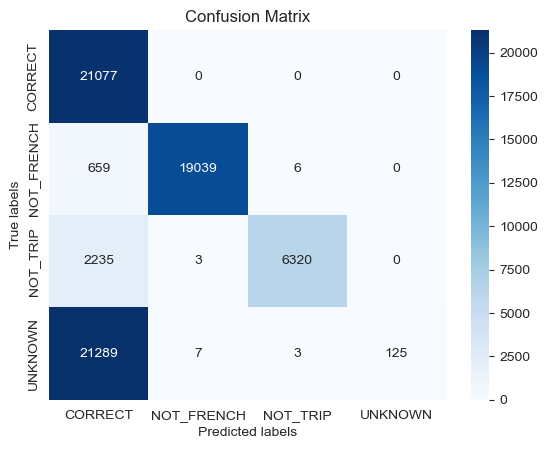

In [19]:
import seaborn as sns

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

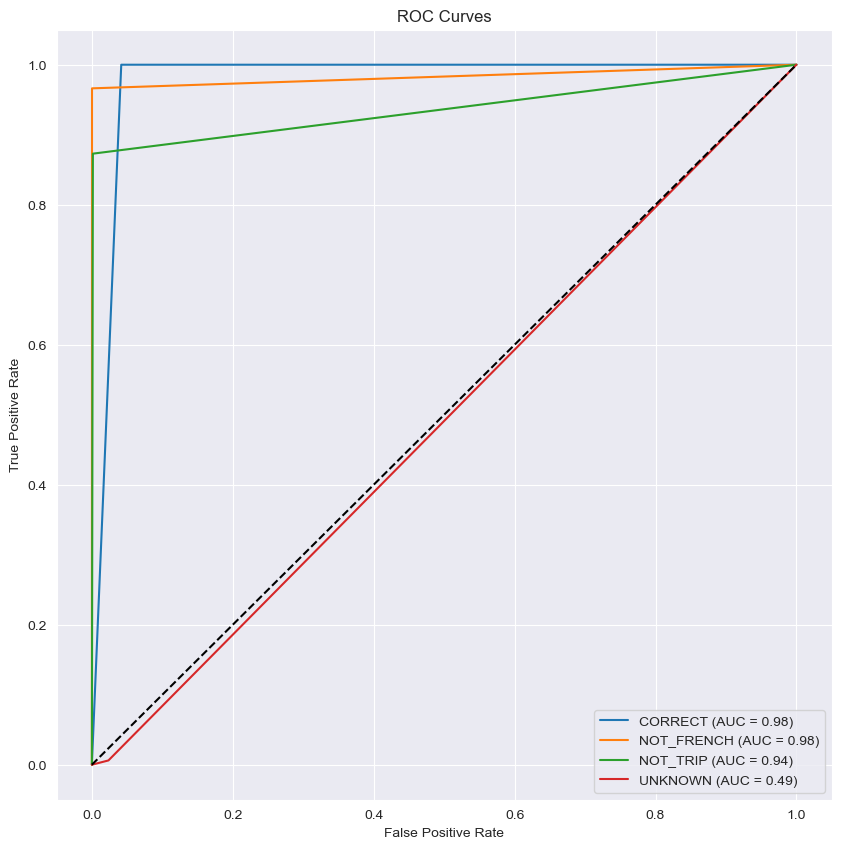

In [20]:
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(labels)):
    fpr[i], tpr[i], _ = roc_curve(y_test.values[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure(figsize=(10, 10))

for i in range(len(labels)):
    plt.plot(fpr[i], tpr[i], label=f"{labels[i]} (AUC = {roc_auc[i]:.2f})")
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

In [21]:
texts = [
    "Je veux aller au cinéma",
    "Je veux aller du cinéma au restaurant",
    "I'd like to go from the cinema to the restaurant",
    "I'd like to Paris from Nanterre",
    "zaeazea eaz e:az e,az e\"zahoiplù;!:gf",
    "J'aimerais me rendre de Nanterre à Paris",
    "Je veux aller de Le Havre à Port-Boulet",
    "Nantes à Toulouse",
    "Dirige moi vers Lyon depuis Saint-Étienne.",
    "Trouve moi un itinéraire pour aller chez Emma de Paris à Marseille",
]

predicted_labels = pipeline.predict(texts)
predicted_proba = pipeline.predict_proba(texts)

# Displaying the predicted labels and probability scores for new texts
for text, p_labels, prob in zip(texts, predicted_labels, predicted_proba):
    print("*", text)
    for i, score in enumerate(prob):
        print(' -', id2label[i], '=>', f"{round(score * 100, 1)}%")
    print()

* Je veux aller au cinéma
 - CORRECT => 0.1%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 100.0%
 - UNKNOWN => 0.0%

* Je veux aller du cinéma au restaurant
 - CORRECT => 1.4%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 98.9%
 - UNKNOWN => 0.0%

* I'd like to go from the cinema to the restaurant
 - CORRECT => 0.0%
 - NOT_FRENCH => 100.0%
 - NOT_TRIP => 0.0%
 - UNKNOWN => 0.0%

* I'd like to Paris from Nanterre
 - CORRECT => 0.0%
 - NOT_FRENCH => 100.0%
 - NOT_TRIP => 0.0%
 - UNKNOWN => 0.0%

* zaeazea eaz e:az e,az e"zahoiplù;!:gf
 - CORRECT => 30.1%
 - NOT_FRENCH => 27.9%
 - NOT_TRIP => 31.2%
 - UNKNOWN => 30.2%

* J'aimerais me rendre de Nanterre à Paris
 - CORRECT => 100.0%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 0.0%
 - UNKNOWN => 0.0%

* Je veux aller de Le Havre à Port-Boulet
 - CORRECT => 39.7%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 87.8%
 - UNKNOWN => 0.0%

* Nantes à Toulouse
 - CORRECT => 30.1%
 - NOT_FRENCH => 27.9%
 - NOT_TRIP => 31.2%
 - UNKNOWN => 30.2%

* Dirige moi vers Lyon depuis Saint-É

### On observe moins de faux négatifs qu'avec la vectorisation BoW 1-gram pour la classe "NOT_TRIP" souvent prédite "CORRECT" (3291 faux négatifs avec pour N-grams dans ce cas précis, contre 4486).